In [17]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'#'LiH'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]#[('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################

Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1862.09it/s]


{0: [(0.16592785032250768+0j) [Z1 Z2]],
 1: [(0.12062523481381837+0j) [Z0 Z2]],
 2: [(0.16592785032250768+0j) [Z0 Z3]],
 3: [(0.174412876106516+0j) [Z2 Z3]],
 4: [(0.1686889816869329+0j) [Z0 Z1]],
 5: [(0.12062523481381837+0j) [Z1 Z3]],
 6: [(-0.09706626861762624+0j) []],
 7: [(-0.04530261550868928+0j) [Y0 Y1 X2 X3], (-0.2234315367466397+0j) [Z2]],
 8: [(-0.04530261550868928+0j) [X0 X1 Y2 Y3], (-0.2234315367466397+0j) [Z3]],
 9: [(0.04530261550868928+0j) [X0 Y1 Y2 X3], (0.171412826394024+0j) [Z1]],
 10: [(0.04530261550868928+0j) [Y0 X1 X2 Y3], (0.17141282639402405+0j) [Z0]]}

The Hamiltonian is a sum of $m$ PauliWords:

$$H=\sum_{j=0}^{m-1} \alpha_{j} P_{j}$$

In this there are $l$ completely anti-commuting sets, denoted as $H_{S_{l}}$:


$$H =\sum_{l} H_{S_{l}}$$

where each anti-commuting set is defined as:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}$$

where:
- $\left\{P_{j}, P_{k}\right\}=0$ for $\forall P_{j} \neq P_{k} \in S_{l}$


We want **want** the sum of the squares of the cofactors to be 1:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

- aka: $\sum_{j} \beta_{j}^{2}=1$
- and $\gamma_{l}$ is the correction factor: $\alpha_{j} =  \gamma_{l} \beta_{j}$

SO overall we can turn our Hamiltonian into $l$ anti_commutings sets as:

$$H=\sum_{l} H_{S_{l}} = \sum_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \alpha_{j} P_{j}= \sum_{l} \gamma_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

We will focus on looking at just one anti-commuting set

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

////////////////

1. re-write set $H_{S_{l}}$ ($=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$) with $\beta_{n} P_{n}$ outside sum :


$$H_{S_{l}}= \gamma_{l} \beta_{n} P_{n} +  \gamma_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

- $\sum_{j} \beta_{j}^{2}=1$
- $\alpha_{j} =  \gamma_{l} \beta_{j}$

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$


2. The definition of $H_{n-1}$ is:

$$H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$$

where: $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

therefore using what we obtained in step 1:

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \delta_{j} P_{j}$$

where:
- $\sum_{j} \delta_{j}^{2}=1$
- $\beta_{j} =  \Omega_{l} \delta_{j}$


3.

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1}$$

$H_{n}$ is defined as:

$$H_{n}=\cos \phi_{n-1} P_{n}+\sin \phi_{n-1} H_{n-1}$$

Using what we have from step 3:

$$\cos \phi_{n-1}= {\beta_{n}} $$

OR

$$\sin \phi_{n-1}= {\Omega_{l}} $$

**important!** the choice of $\phi_{n-1}$ is determined by the sign of $\beta_{n}$ and $\Omega_{l}$. As $\Omega_{l}$ is **ALWAYS** positive, $\phi_{n-1}$ is always $\leq \pi$... therefore IF $\arccos(\beta_{n}) > \pi$ THEN $\phi_{n-1}= 2\pi - \arccos(\beta_{n})$

(selects the correct quadrant for sine and cosine!)

## Step 1 getting X

$\mathcal{X}$ is defined as:

$$\begin{aligned} \mathcal{X} &=\frac{i}{2}\left[H_{n-1}, P_{n}\right] \\ &=\frac{i}{2} \sum_{k=1}^{n-1} \delta_{k}\left[P_{k}, P_{n}\right] \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{k} P_{n} \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{kn} \end{aligned}$$

where:
- $H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$
- $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

In [18]:
from quchem.LCU_method import *

In [19]:
test = Get_X_SET(anti_commuting_sets[9], 0)
print('i *',test['H_n_1'],'*', test['P_n'])
test['X_PauliWords']

i * [(1+0j) [Z1]] * 1 [X0 Y1 Y2 X3]


[(1+0j) [X0 X1 Y2 X3]]

### note this must also be consistent

$$H_{n}= \sin \phi_{n-1} H_{n-1} + \cos \phi_{n-1} P_{n}$$

In [20]:
test = Get_X_SET(anti_commuting_sets[9], 0)
print(test['H_n'])
print('should equal')
print(np.sin(test['phi_n_1']), '*',test['H_n_1'],' + ', np.cos(test['phi_n_1']),  '*',test['P_n'])

[(0.9668047296891765+0j) [Z1], (0.25551636865500055+0j) [X0 Y1 Y2 X3]]
should equal
(0.9668047296891766-0j) * [(1+0j) [Z1]]  +  (0.2555163686550006+0j) * 1 [X0 Y1 Y2 X3]


Now $\mathcal{X}$ acts on $H_{n}$ as follows:

$$\mathcal{X} H_{n}=i\left(-\sin \phi_{n-1} P_{n}+\cos \phi_{n-1} H_{n-1}\right)$$

where:
- $H_{n}=\sin \phi_{n-1} H_{n-1}+\cos \phi_{n-1} P_{n}$

remember:

- $H_{n}=\frac{H_{S}}{\gamma_{l}}= \beta_{n} P_{n} + \Omega_{l} H_{n-1}$... which defines what $\phi_{n-1}$ is!


We let:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

then the following:
$$R H_{n} R^{\dagger}=\sin \left(\phi_{n-1}-\alpha\right) H_{n-1}+\cos \left(\phi_{n-1}-\alpha\right) P_{n}$$

by **choosing**: $\alpha=\phi_{n-1}$
we get:

$$R H_{n} R^{\dagger}=P_{n}$$

- note $\alpha = arccos(\beta_{n})$ 

overall we want **$$ H_{n} = R^{\dagger} P_{n} R$$**

To do this via a **quantum circuit** we do the following:

$$ \langle H_{n}\rangle =  \langle \psi_{UCCSD}|R^{\dagger} P_{n} R |\psi_{UCCSD}\rangle = M_{z} U_{n}R|\psi_{UCCSD}\rangle$$ 

where:
- $ U_{n}$ is a change of basis of $P_{n}$ to $Z$ basis for measurement!
- $M_{z}$ is a measurement in $Z$ basis resuliting in: $ \langle \psi_{UCCSD}|R^{\dagger} U_{n}^{\dagger} M_{z}^{\dagger} M_{z} U_{n}R|\psi_{UCCSD}\rangle$


NOW!
let us take a closer look at:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

this is just a **LINEAR COMBINATION OF PAULIWORDS!**

- $\mathcal{X}=i \sum_{k=0}^{n-1} \delta_{k} P_{kn}$ (index starts at 0 with identity term included!)

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

my code has $\bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$ in code!

(could simplify too: [not doing atm])
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}+ \sin (\alpha / 2) \bigg( \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

In [ ]:
Get_R_linear_combination(anti_commuting_sets[7], 0)

## linear combination of unitaries method!

https://arxiv.org/pdf/1610.06546.pdf

- for any operator $\hat{O}$ that is a sum of **unitary** operators $\hat{U}_{j}$:

$$\hat{O}=\sum_{j=1}^{d} \alpha_{j} \hat{U}_{j}$$

- where $\|\hat{O}\| \leq\|\vec{\alpha}\|_{1}=\sum_{j=1}^{d}\left|\alpha_{j}\right|$

and

- **IMPORTANT** $\forall \alpha_{j}$ we have  $\alpha_{j} \geq 0$ AKA absorbing complex phases into $\hat{U}_{j}$

If we define the following:

$$\hat{U}=\sum_{j=1}^{d}|j\rangle\left\langle\left. j\right|_{a} \otimes \hat{U}_{j}\right.$$

$$\hat{G}=\sum_{j=0}^{d-1} \sqrt{\frac{\alpha_{j}}{\|\vec{\alpha}\|_{1}}} |j\rangle  \langle 0|_{a} + \ldots.$$

The most important factor about the matrix $\hat{G}$, is the coefficients $\alpha_{j}$ only define the first column of the matrix, (resulting in  $\hat{G}|0\rangle_{a} \mapsto |G\rangle_{a}$) the rest of the columns in $\hat{G}$ must be orthogonal, but can have any values - hence there is a freedom of choice when defining $\hat{G}$. 

A **practical note** on this is if one finds a quantum circuit that performs $|0\rangle_{a} \mapsto |G\rangle_{a}$, then its action on other basis states will automatically be accounted for and $\hat{G}$ is completely defined (provided the quantum circuit is composed as a product of unitaries).

We have:

$$\hat{U} \hat{G}|0\rangle_{a}|\psi\rangle_{s} = \frac{\hat{U}}{\sqrt{\|\vec{\alpha}\|_{1}}} |G\rangle_{a}|\psi\rangle_{s}$$

This results in:

$$\hat{U}|G\rangle_{a}|\psi\rangle_{s}=|G\rangle_{a} \hat{O}|\psi\rangle_{s}+\sqrt{1-\| \hat{O}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$

overall:

$$\frac{\hat{U}}{\sqrt{\|\vec{\alpha}\|_{1}}}|G\rangle_{a}|\psi\rangle_{s}= |G\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$


THEN finally application of $\hat{G}^{\dagger}$:


$$\hat{G}^{\dagger} \bigg( |G\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s} \bigg) \mapsto  |0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{1}}} |\psi\rangle_{s}+ unknown \: ortho \: state$$


Hence measuring $|0\rangle_{a}$ results in:

$$|0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{1}}} |\psi\rangle_{s} = \frac{\hat{O}}{\|\vec{\alpha}\|_{1}}|\psi\rangle_{s}$$


- the measurement succeed with probability: $\| \hat{O}|\psi\rangle \|^{2}$
    - and $\hat{U}|G\rangle_{a}|\psi\rangle_{s}$ is **projected** onto $\frac{|G\rangle_{a} \hat{O}|\psi\rangle_{s}}{\| \hat{O}|\psi\rangle \|}$

- and fails if it goes onto orthogonal complement : $|G_{\psi}^{\perp}\rangle_{a s} = |G^{\perp}\rangle_{a}|\psi\rangle_{s}$


NOTE:
as **probabilities are bounded by 1** the operator $\hat{O}$ must have spectral norm $\|\hat{O}\|_{2} \leq 1$

- note spectral norm same as $l_{2}$ norm of matrix


aka we are implementing R:

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$


note:
- $\|A\|_{1}=\max _{1 \leq j \leq n} \sum_{i=1}^{m}\left|a_{i j}\right|$
- $\|A\|_{2}=\sigma_{\max }(A) \leq\|A\|_{\mathrm{F}}=\left(\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}\right)^{\frac{1}{2}}$

example:

$A=\left[\begin{array}{ccc}-3 & 5 & 7 \\ 2 & 6 & 4 \\ 0 & 2 & 8\end{array}\right]$

$\|A\|_{1}=\max (|-3|+2+0 ; 5+6+2 ; 7+4+8)=\max (5,13,19)=19$

$\|A\|_{2} \leq \|A\|_{F}= \sqrt{|-3|^{2}+|2|^{2}+|0|^{2}+|5|^{2}+|6|^{2}+|2|^{2} +|7|^{2}+|4|^{2} +|8|^{2}}=\sqrt{207}=14.39$

In [ ]:
# A = np.array([[-3,5,7],
#          [2,6,4],
#          [0,2,8]])

# # np.dot(A.transpose(), A)
# val, vec = np.linalg.eig(np.dot(A.transpose(), A))
# np.sqrt(max(val))

$A*A=\left[\begin{array}{ccc} 13 & -3 & -13 \\ -3 & 65 & 75 \\ -13 & 75 & 129\end{array}\right]$

eigenvalues = [179.48079367,   8.81029291,  18.70891342]

$\lambda_{\max }\left(A^{*} A\right)=179.48079367$

$\|A\|_{2}=\sqrt{\lambda_{\max }\left(A^{*} A\right)}=\sigma_{\max }(A)$

- $\sigma_{\max }(A)$ represents the largest singular value of matrix $A$

$\|A\|_{2}=\sqrt{179.48079367}= 13.397044214055192$

In [21]:
test, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[10],0)
print(test)

print('')
print(Pn, gamma_l)
absorb_complex_phases(test)

[(0.7923119236307757+0j) [], 0.6101162312809747j [X0 X1 X2 Y3]]

1 [Y0 X1 X2 Y3] (0.17729829109248618+0j)


([0.7516363672307422 [], 0.6595777220738832 [X0 X1 X2 Y3]],
 [1, 1j],
 [0.7516363672307422, 0.6595777220738832],
 1.4024281549117505)

In [22]:
from quchem.Ansatz_Generator_Functions import *

ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)

Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab = ansatz_obj.Get_ia_and_ijab_terms()

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops,
                                                                                                                    transformation='JW')

full_ansatz_Q_Circ = Ansatz_Circuit(Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab,
             Hamilt.molecule.n_qubits, Hamilt.molecule.n_electrons)

ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_parameters_ia, theta_parameters_ijab)

In [23]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[9], 1)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)


Q_circuit = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, ansatz_cirq_circuit)
Q_circuit

0: ───X──────────────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────@───────────H──────────Rx(0.5π)───@──────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───H──────────@──────────────────────────────@──────────H───────────Rx(0.5π)───@───────────────────────────────────────@───────────Rx(-0.5π)───H──────────@───────────────────────────────────────@───────────H───────────H───@───────────────────────────────────────@──────────H───Rx(0.5π)───@──────────────────────────────────────@───Rx(-0.5π)───I──────X0──────────────────────────────────
                                    │                       │                   │                      │                                                                                                                    │                               │                                 │                              │                                  │                              │                          │                              │                                 │                                       │                                  │                                       │                           │                                       │                         │                                      │               │      │
1: ───X─────────────────────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H───X───@───────────────────────@───X───────────H──────────Rx(0.5π)───X───@──────────────────────@───X───────────Rx(-0.5π)───H──────────X───@──────────────────────@───X───H───────────Rx(0.5π)───X───@──────────────────────@───X──────────Rx(-0.5π)───H──────────X───@───────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@───────────────────────@───────────X───────────Rx(-0.5π)───H───X───@───────────────────────@───────────X──────────H───Rx(0.5π)───X───@──────────────────────@───────────X───Rx(-0.5π)───1*I1───(-0-1j)*X1──────────────────────M───
                                        │               │                           │              │                          │                       │                   │                      │                              │                       │                                         │                      │                                          │                      │                                  │                      │                                         │                       │                                                  │                       │                                           │                       │                                         │                      │                           │      │                               │
2: ───H─────────────────────────────────X───Rz(-0.0π)───X───H───Rx(0.5π)────────────X───Rz(0.0π)───X───Rx(-0.5π)──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───────────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@──────────────@───X───Rx(-0.5π)───H──────────────────────────X───@──────────────@───X───H───H──────────────────────────X───@──────────────@───X───H──────────Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───H───────────────────X───@───────────────@───X───────────H──────────H──────────────────X───@──────────────@───X───────────H───────────────┼──────Y2──────────────────────────────┼───
                                                                                                                           

In [24]:
from quchem.quantum_circuit_functions import *
N_System_qubits = 3
ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_System_qubits)
ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()

print(ancilla_prep_circ.to_text_diagram(transpose=True))   

print(ancilla_obj.get_wave_function(sig_figs=5))
print('')
print(ancilla_amplitudes)



3
│
 U = 0.3459 rad
│
[[0.94076+0.j]
 [0.33908+0.j]]

[0.9407564774862406, 0.3390829545519511]


In [25]:
n_shots=10000

testing =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 n_shots,
                 Hamilt.molecule.n_qubits,
                 N_indices_dict={7:1, 8:0, 9:0, 10:0})
testing.Calc_Energy()

(-1.1179016812018263+0j)

$$U_{UCCSD}^{H2}=e^{-i \theta Y_{0} X_{1} X_{2} X_{3}}$$

In [26]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit


In [27]:
n_shots=1000
def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     Hamilt.molecule.n_qubits,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    return VQE_exp_LCU.Calc_Energy()

GIVE_ENERGY(1.5)#np.pi/5)

(0.42917534249013484+0j)

In [28]:
n_shots=10000
def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     Hamilt.molecule.n_qubits,
                     N_indices_dict={7:0, 8:0, 9:1, 10:0})
    return VQE_exp_LCU.Calc_Energy()

GIVE_ENERGY(np.pi)

(-1.1151762424174398+0j)

(-1.1368430951074306+0j)


/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


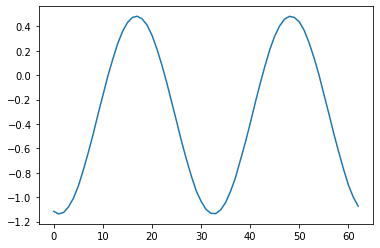

In [29]:
### full angle scan
import matplotlib.pyplot as plt
%matplotlib inline

theta_list = np.arange(0,2*np.pi, 0.1)
# theta_list = np.arange(0.98*np.pi, 1.02*np.pi, 0.001)

E_list = [GIVE_ENERGY(theta) for theta in theta_list]

plt.plot(E_list)
print(min(E_list))

In [14]:
Hamilt.molecule.fci_energy

array(-1.13728383)